In [22]:
# Import des librairies

import os
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.models import Sequential

In [2]:
# ÉTUDE DU DATASET

# Variable cible : final_result
learning_analytics_B = pd.read_csv("learning_analytics_B.csv" , sep = ',', header = 0, index_col = 0)
learning_analytics_J = pd.read_csv("learning_analytics_J.csv" , sep = ',', header = 0, index_col = 0)

def resumetable(df):
    print("Format de la base : {}".format(df.shape))
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"]).reset_index() #initialisation
    summary["Name"] = summary["index"] #Nom des colonnes
    summary = summary[["Name","dtypes"]]
    summary["Missing"] = df.isnull().sum().values #Nombre de valeurs manquantes
    summary["Uniques"] = df.nunique().values #Nb de modalités uniques
    summary["First Value"] = df.iloc[0].values #Exemple des 3 premieres lignes
    summary["Second Value"] = df.iloc[1].values 
    summary["Third Value"] = df.iloc[2].values 

    return summary

print('•\tSTATS MACROS SUR LA TABLE : learning_analytics_B')
display( resumetable(learning_analytics_B) )

print("•\tSTATS MACROS SUR LA TABLE : learning_analytics_J")
display( resumetable(learning_analytics_J) )

•	STATS MACROS SUR LA TABLE : learning_analytics_B
Format de la base : (9798, 17)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,final_result,object,0,4,Fail,Pass,Fail
1,disability,object,0,2,N,N,N
2,module_presentation_length,int64,0,3,241,240,240
3,gender,object,0,2,M,F,M
4,highest_education,object,0,5,HE Qualification,Lower Than A Level,A Level or Equivalent
5,imd_band,object,399,10,80-90%,90-100%,20-30%
6,num_of_prev_attempts,int64,0,7,1,0,0
7,region,object,0,13,Scotland,East Anglian Region,London Region
8,studied_credits,int64,0,41,120,60,120
9,age_band,object,0,3,55<=,35-55,35-55


•	STATS MACROS SUR LA TABLE : learning_analytics_J
Format de la base : (16041, 17)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,final_result,object,0,4,Pass,Withdrawn,Fail
1,disability,object,0,2,N,N,N
2,module_presentation_length,int64,0,4,268,268,262
3,gender,object,0,2,F,F,M
4,highest_education,object,0,5,A Level or Equivalent,Lower Than A Level,Lower Than A Level
5,imd_band,object,599,10,0-10%,20-30%,70-80%
6,num_of_prev_attempts,int64,0,7,0,1,1
7,region,object,0,13,West Midlands Region,Wales,East Anglian Region
8,studied_credits,int64,0,43,60,120,60
9,age_band,object,0,3,35-55,0-35,0-35


In [5]:
# CREATION DU PROFILE REPORT DES 2 DATASETS
files = os.listdir()

for file in files:
    if file.__contains__('.csv'):
        df_ = pd.read_csv(file)
        profile = ProfileReport(df_, title="Pandas Profiling Report for "+file.replace(".csv","") )
        profile.to_file("ProfileReport/" + file.replace(".csv","") + ".html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# DATA PREPARATION

print('•\tDATA PREPARATION')

# remplissage des null de imb_band par 40-50% 
learning_analytics_B['imd_band'] = learning_analytics_B['imd_band'].fillna('40-50%')
learning_analytics_J['imd_band'] = learning_analytics_J['imd_band'].fillna('40-50%')

# remplissage des null de la moyenne pondérée par la moyenne
learning_analytics_B['Moyenne pondérée de score'] = learning_analytics_B['Moyenne pondérée de score'].fillna(learning_analytics_B['Moyenne de score'])
learning_analytics_J['Moyenne pondérée de score'] = learning_analytics_J['Moyenne pondérée de score'].fillna(learning_analytics_J['Moyenne de score'])

# remplissage des null de Nombre de date par 0 
learning_analytics_B['Nombre de date'] = learning_analytics_B['Nombre de date'].fillna(0)
learning_analytics_J['Nombre de date'] = learning_analytics_J['Nombre de date'].fillna(0)

# remplissage des null de sum_click par 0
learning_analytics_B['sum_click'] = learning_analytics_B['sum_click'].fillna(0)
learning_analytics_J['sum_click'] = learning_analytics_J['sum_click'].fillna(0)

# remplissage des null de Nombre de activity_type par 0
learning_analytics_B['Nombre de activity_type'] = learning_analytics_B['Nombre de activity_type'].fillna(0)
learning_analytics_J['Nombre de activity_type'] = learning_analytics_J['Nombre de activity_type'].fillna(0)

# On ne prend pas les moyennes de score ni les dates d'enregistrement null
learning_analytics_B = learning_analytics_B.dropna(subset=['Moyenne de score', 'date_registration'])
learning_analytics_J = learning_analytics_J.dropna(subset=['Moyenne de score', 'date_registration'])

print('•\tDATA PREPARATION : OK')

•	DATA PREPARATION
•	DATA PREPARATION : OK


In [8]:
print('\t○\tSTATS MACROS APRES LA DATA PREP : learning_analytics_B')
display( resumetable(learning_analytics_B) )

print("\t○\tSTATS MACROS  APRES LA DATA PREP : learning_analytics_J")
display( resumetable(learning_analytics_J) )

	○	STATS MACROS APRES LA DATA PREP : learning_analytics_B
Format de la base : (9786, 17)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,final_result,object,0,4,Fail,Pass,Fail
1,disability,object,0,2,N,N,N
2,module_presentation_length,int64,0,3,241,240,240
3,gender,object,0,2,M,F,M
4,highest_education,object,0,5,HE Qualification,Lower Than A Level,A Level or Equivalent
5,imd_band,object,0,10,80-90%,90-100%,20-30%
6,num_of_prev_attempts,int64,0,7,1,0,0
7,region,object,0,13,Scotland,East Anglian Region,London Region
8,studied_credits,int64,0,41,120,60,120
9,age_band,object,0,3,55<=,35-55,35-55


	○	STATS MACROS  APRES LA DATA PREP : learning_analytics_J
Format de la base : (16026, 17)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,final_result,object,0,4,Pass,Withdrawn,Fail
1,disability,object,0,2,N,N,N
2,module_presentation_length,int64,0,4,268,268,262
3,gender,object,0,2,F,F,M
4,highest_education,object,0,5,A Level or Equivalent,Lower Than A Level,Lower Than A Level
5,imd_band,object,0,10,0-10%,20-30%,70-80%
6,num_of_prev_attempts,int64,0,7,0,1,1
7,region,object,0,13,West Midlands Region,Wales,East Anglian Region
8,studied_credits,int64,0,43,60,120,60
9,age_band,object,0,3,35-55,0-35,0-35


In [9]:
    # Création du vecteur label
label_learning_analytics_B = learning_analytics_B['final_result']
label_learning_analytics_J = learning_analytics_J['final_result']
    # Suprression de la colonne target : final_result
del learning_analytics_B['final_result']
del learning_analytics_J['final_result']

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

def model_final_result(label_learning_analytics, df_learning_analytics):
    
    #vecorizer = DictVectorizer()
    #df_learning_analytics = vectorizer.fit_transform(df_learning_analytics)

    # Split the data into training/testing sets
    #X_train = df_learning_analytics[:-20]
    #X_test = df_learning_analytics[-20:]
    # Split the targets into training/testing sets
    #y_train = label_learning_analytics[:-20]
    #y_test = label_learning_analytics[-20:]

    df_learning_analytics['disability'] = df_learning_analytics['disability'].astype(str)
    df_learning_analytics['module_presentation_length'] = df_learning_analytics['module_presentation_length'].astype(str)
    df_learning_analytics['gender'] = df_learning_analytics['gender'].astype(str)
    df_learning_analytics['highest_education'] = df_learning_analytics['highest_education'].astype(str)
    df_learning_analytics['imd_band'] = df_learning_analytics['imd_band'].astype(str)
    df_learning_analytics['num_of_prev_attempts'] = df_learning_analytics['num_of_prev_attempts'].astype(str)
    df_learning_analytics['region'] = df_learning_analytics['region'].astype(str)
    df_learning_analytics['studied_credits'] = df_learning_analytics['studied_credits'].astype(str)
    df_learning_analytics['age_band'] = df_learning_analytics['age_band'].astype(str)
    df_learning_analytics['Nombre de date_submitted'] = df_learning_analytics['Nombre de date_submitted'].astype(str)
    df_learning_analytics['Moyenne de score'] = df_learning_analytics['Moyenne de score'].astype(str)
    df_learning_analytics['Moyenne pondérée de score'] = df_learning_analytics['Moyenne pondérée de score'].astype(str)
    df_learning_analytics['date_registration'] = df_learning_analytics['date_registration'].astype(str)
    df_learning_analytics['Nombre de date'] = df_learning_analytics['Nombre de date'].astype(str)
    df_learning_analytics['sum_click'] = df_learning_analytics['sum_click'].astype(str)
    df_learning_analytics['Nombre de activity_type'] = df_learning_analytics['Nombre de activity_type'].astype(str)

    X = df_learning_analytics
    y = label_learning_analytics
    
    y = y.replace('Fail', 0)
    y = y.replace('Pass', 1)
    y = y.replace('Withdrawn', 2)
    y = y.replace('Distinction', 3)

    # Convert the label vector to one-hot encoding
    y = to_categorical(y)
    
    X = OneHotEncoder().fit_transform(X).toarray()
    
    # Split into training and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    """
    # The coefficients
    print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(X_test, y_test, color="black")
    plt.plot(X_test, y_pred, color="blue", linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    """
    return  X_train, X_test, y_train, y_test, y_pred, regr
    
X_train, X_test, y_train, y_test, y_pred, regr = model_final_result(label_learning_analytics_B, learning_analytics_B)

(1958, 15373) (1958, 4) (1958, 4)
Coefficients: 
 [[ 0.01564297  0.05516373  0.04130706 ... -0.31402603 -0.15356659
   0.1571172 ]
 [ 0.00275852  0.01618273 -0.00902822 ... -0.12739236  0.05911524
  -0.03421002]
 [-0.00408116 -0.05650774 -0.03729653 ...  0.32219972  0.1950162
  -0.14940104]
 [-0.01050636 -0.01102313  0.00286735 ...  0.1192203  -0.10054795
   0.02649768]]
Mean squared error: 0.96
Coefficient of determination: -4.70


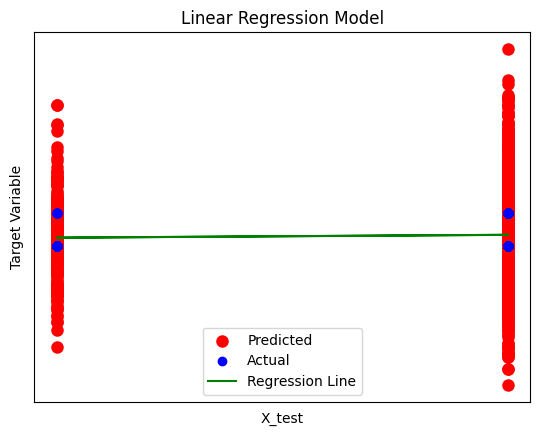

In [17]:
%matplotlib inline
print(X_test.shape, y_test.shape, y_pred.shape)
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32') #.reshape((-1,1))
y_test = np.asarray(y_test).astype('float32') 

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Select a single target variable to plot
target_index = 0

# Create a scatter plot of the actual vs. predicted values for the selected target variable

plt.scatter(x=X_test[:, target_index], y=y_pred[:, target_index], color='red', label='Predicted',  linewidth=3)
plt.scatter(x=X_test[:, target_index], y=y_test[:, target_index], color='blue', label='Actual')

# Add a regression line to the plot
m, b = np.polyfit(X_test[:, target_index], y_pred[:, target_index], 1)
plt.plot(X_test[:, target_index], m * X_test[:, target_index] + b, color='green', label='Regression Line')

# Add labels and a legend to the plot
plt.xlabel('X_test')
plt.ylabel('Target Variable')
plt.title('Linear Regression Model')
plt.legend()

"""
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
"""
plt.xticks(())
plt.yticks(())

plt.show()

	○	Shapes of training and testing datasets
(7828, 15373) (1958, 15373) (7828, 4) (1958, 4)
Epoch 1/10
245/245 [==============================] - 2s 8ms/step - loss: 0.1456 - accuracy: 0.5502 - val_loss: 0.1342 - val_accuracy: 0.5863
Epoch 2/10
245/245 [==============================] - 2s 7ms/step - loss: 0.0976 - accuracy: 0.7151 - val_loss: 0.1395 - val_accuracy: 0.5802
Epoch 3/10
245/245 [==============================] - 2s 7ms/step - loss: 0.0472 - accuracy: 0.8715 - val_loss: 0.1649 - val_accuracy: 0.5526
Epoch 4/10
245/245 [==============================] - 2s 7ms/step - loss: 0.0222 - accuracy: 0.9446 - val_loss: 0.1735 - val_accuracy: 0.5490
Epoch 5/10
245/245 [==============================] - 2s 7ms/step - loss: 0.0107 - accuracy: 0.9743 - val_loss: 0.1796 - val_accuracy: 0.5419
Epoch 6/10
245/245 [==============================] - 2s 7ms/step - loss: 0.0064 - accuracy: 0.9847 - val_loss: 0.1849 - val_accuracy: 0.5455
Epoch 7/10
245/245 [==============================] - 2s 

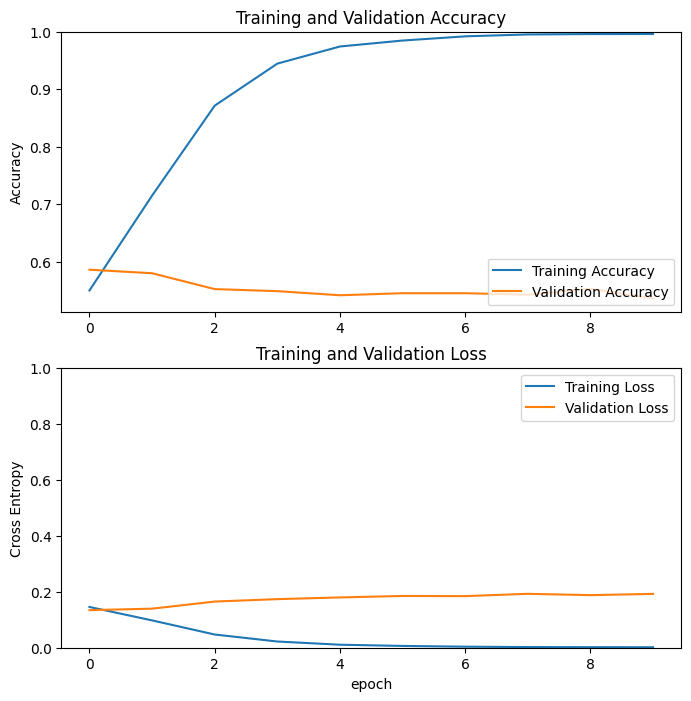

In [60]:
from keras.optimizers import Adam,Nadam, SGD

def plot_model_evolution(history):
    # Learning curves
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
def cnn_model_final_result(label_learning_analytics, df_learning_analytics, epochs):
    
    X = df_learning_analytics
    y = label_learning_analytics
    
    y = y.replace('Fail', 0)
    y = y.replace('Pass', 1)
    y = y.replace('Withdrawn', 2)
    y = y.replace('Distinction', 3)

    # Convert the label vector to one-hot encoding
    y = to_categorical(y)
    
    X = OneHotEncoder().fit_transform(X).toarray()
    
    # Split into training and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    X_train = np.asarray(X_train).astype('float32')
    X_test = np.asarray(X_test).astype('float32')
    y_train = np.asarray(y_train).astype('float32') #.reshape((-1,1))
    y_test = np.asarray(y_test).astype('float32') #.reshape((-1,1))

    print('\t○\tShapes of training and testing datasets')
    print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)
    
    """
    # Define the CNN model architecture
    model = Sequential()
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    print('\t○\tModel Compilation')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    """
    
    model = Sequential()
    
    model.add(Dense(128, kernel_initializer='uniform', input_shape=(15373,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    opt = Adam(learning_rate=0.001)
    #model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

    # Train the model on the training set
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

    # Evaluate the model on the testing set
    print('\t○\tModel Evalutation')
    loss, accuracy = model.evaluate(X_test, y_test)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)

    return X, y, model, X_train, y_train, X_test, y_test, history

X, y, model, X_train, y_train, X_test, y_test, history = cnn_model_final_result(label_learning_analytics_B, learning_analytics_B, 10)
plot_model_evolution(history)